In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import math
from collections import Counter

In [2]:
df = pd.read_csv('fruit.csv')

In [3]:
df['Fruit_Name'] = df['Fruit_Name'].map({'Apple':0, 'Orange':1})

In [4]:
df['Fruit_Name']

0       0
1       1
2       1
3       0
4       0
       ..
1215    1
1216    0
1217    1
1218    0
1219    1
Name: Fruit_Name, Length: 1220, dtype: int64

In [5]:
X = df.drop('Fruit_Name', axis=1)
y = df['Fruit_Name']

In [6]:
idx_0 = np.where(y == 0)[0]
idx_1 = np.where(y == 1)[0]

random.shuffle(idx_0)
random.shuffle(idx_1)

train_0 = int(len(idx_0) * 0.8)
train_1 = int(len(idx_1) * 0.8)

train_idx = np.concatenate([idx_0[:train_0], idx_1[:train_1]])
test_idx = np.concatenate([idx_0[train_0:], idx_1[train_1:]])

X_train = X.iloc[train_idx].values 
X_test = X.iloc[test_idx].values 
y_train = y.iloc[train_idx].values 
y_test = y.iloc[train_idx].values 
# X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
# y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Acidity             1211 non-null   float64
 1   Firmness            1211 non-null   float64
 2   Sweetness           1212 non-null   float64
 3   Weight              1213 non-null   float64
 4   Water_Content       1213 non-null   float64
 5   Fruit_Name          1220 non-null   int64  
 6   Acid_Firm_Ratio     1198 non-null   float64
 7   Sweet_Acid_Balance  1198 non-null   float64
 8   Density_Index       1206 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 85.9 KB


In [8]:
def min_max(X):
    X = np.array(X, dtype=float)        # pastikan numpy + float
    X_scaled = X.copy()
    
    for i in range(X.shape[1]):
        col = X[:, i]                    # PAKAI INI, BUKAN .iloc !!!
        min_val = col.min()
        max_val = col.max()
        
        if max_val > min_val:
            X_scaled[:, i] = (col - min_val) / (max_val - min_val)
        else:
            X_scaled[:, i] = 0.5         # atau 0
            
    return X_scaled

# SEKARANG INI JALAN 100%!
X_train_scaled = min_max(X_train)
X_test_scaled  = min_max(X_test)

In [17]:
def predik(X_train, y_train, x_test, k=5):
    x_test = np.array(x_test).ravel()
    distance = []
    for i in range(len(X_train)):
        dist = math.sqrt(np.sum((X_train[i] - x_test) ** 2))
        distance.append((dist, y_train[i]))

    distance.sort(key=lambda x: x[0])
    labels = [label for _, label in distance[:k]]
    return Counter(labels).most_common(1)[0][0]

In [10]:
# def knn_predict(X_train, y_train, x_test, k=5):
#     distance = []
#     for i in range(len(X_train)):
#         dist = math.sqrt(np.sum((X_train[i] - x_test) ** 2))
#         distance.append((dist, y_train.values[i]))

#     distance.sort(key=lambda x: x[0])

#     neighboor = distance[:k]
#     labels = [label for _, label in neighboor]

#     return Counter(labels).most_common(1)[0][0]

In [11]:
# accuracies = []
# k_range = range(1,31)

# for K in k_range:
#     correct = 0
#     for i in range(len(X_test_scaled)):
#         pred = predik(X_train_scaled, y_train, X_test_scaled[i], k=K)
#         if pred == y_test[i]:
#             correct += 1
#     acc = correct / len(X_test_scaled) 
#     accuracies.append(acc)
#     print(f"K = {K:2d}\nAccuracy = {acc:.4f}")

# best_k = k_range[np.argmax(accuracies)]
# best_acc = max(accuracies)

# print(f"\n=== K TERBAIK = {best_k} dengan Accuracy = {best_acc:.4f} ===")

accuracies = []
k_range = range(1, 31)

for K in k_range:
    correct = 0
    for i in range(len(X_test_scaled)):
        pred = predik(X_train_scaled, y_train, X_test_scaled[i], k=K)
        if pred == y_test[i]:           # ← y_test[i] juga jalan karena numpy!
            correct += 1
    acc = correct / len(X_test_scaled)
    accuracies.append(acc)
    print(f"K = {K:2d} | Accuracy = {acc:.4f}")

best_k = k_range[np.argmax(accuracies)]
print(f"\n=== K TERBAIK = {best_k} | Akurasi Tertinggi = {max(accuracies):.4f} ===")

K =  1 | Accuracy = 1.0000
K =  2 | Accuracy = 1.0000
K =  3 | Accuracy = 1.0000
K =  4 | Accuracy = 1.0000
K =  5 | Accuracy = 1.0000
K =  6 | Accuracy = 1.0000
K =  7 | Accuracy = 1.0000
K =  8 | Accuracy = 1.0000
K =  9 | Accuracy = 1.0000
K = 10 | Accuracy = 1.0000
K = 11 | Accuracy = 1.0000
K = 12 | Accuracy = 1.0000
K = 13 | Accuracy = 1.0000
K = 14 | Accuracy = 1.0000
K = 15 | Accuracy = 1.0000
K = 16 | Accuracy = 1.0000
K = 17 | Accuracy = 1.0000
K = 18 | Accuracy = 1.0000
K = 19 | Accuracy = 1.0000
K = 20 | Accuracy = 1.0000
K = 21 | Accuracy = 1.0000
K = 22 | Accuracy = 1.0000
K = 23 | Accuracy = 1.0000
K = 24 | Accuracy = 1.0000
K = 25 | Accuracy = 1.0000
K = 26 | Accuracy = 1.0000
K = 27 | Accuracy = 1.0000
K = 28 | Accuracy = 1.0000
K = 29 | Accuracy = 1.0000
K = 30 | Accuracy = 1.0000

=== K TERBAIK = 1 | Akurasi Tertinggi = 1.0000 ===


In [12]:
y_pred = []
for i in range(len(X_test_scaled)):
    pred = predik(X_train_scaled, y_train, X_test_scaled[i], k=best_k)
    y_pred.append(pred)

y_pred = np.array(y_pred)

In [13]:
y_true = y_test.copy()
y_pred = y_pred.copy()

TP = np.sum((y_true == 1) & (y_pred == 1))
TN = np.sum((y_true == 0) & (y_pred == 0))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))

conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

accuracy = (TP + TN) / (TP + TN + FP + FN)

precision_apple = TN / (TN + FN) if (TN +FN) > 0 else 0
precision_orange = TP / (TP + FP) if (TP +FP) > 0 else 0

recall_apple = TN / (TN + FP) if (TN + FP) > 0 else 0
recall_orange = TP / (TP + FN) if (TP + FN) > 0 else 0

f1_apple = 2 * precision_apple * recall_apple / (precision_apple + recall_apple) if (precision_apple + recall_apple) > 0 else 0
f1_orange = 2 * precision_orange * recall_orange / (precision_orange + recall_orange) if (precision_orange + recall_orange) > 0 else 0

print(f"Actual Apple {TN:4d}    {FP:4d}\nActual Orange {FN:4d}  {TP:4d}\n")

print(f"Accuracy : {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print(f"Precision Apple : {precision_apple:.4f}\nRecall : {recall_apple:.4f} \nF1 : {f1_apple:.4f}")
print(f"Precision Apple : {precision_orange:.4f}\nRecall : {recall_orange:.4f} \nF1 : {f1_orange:.4f}")

ValueError: operands could not be broadcast together with shapes (975,) (245,) 

In [15]:
# plt.figure(figsize=(6,5))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Apple', 'Orange'],
#             yticklabels=['Apple', 'Orange'])
# plt.title(f'Confusion Matrix Manual (K={best_k}) - Accuracy = {accuracy:.4f}')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

# CELL: Visualisasi Confusion Matrix (100% Manual + Seaborn cuma buat gambar)

plt.figure(figsize=(6, 5))

sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Apple', 'Orange'],
            yticklabels=['Apple', 'Orange'],
            linewidths=0.5, 
            linecolor='gray',
            cbar=False)

plt.title(f'Confusion Matrix Manual (K = {best_k})\nAccuracy = {accuracy:.4f} ({accuracy*100:.2f}%)', 
          fontsize=14, pad=20)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

NameError: name 'conf_matrix' is not defined

<Figure size 600x500 with 0 Axes>

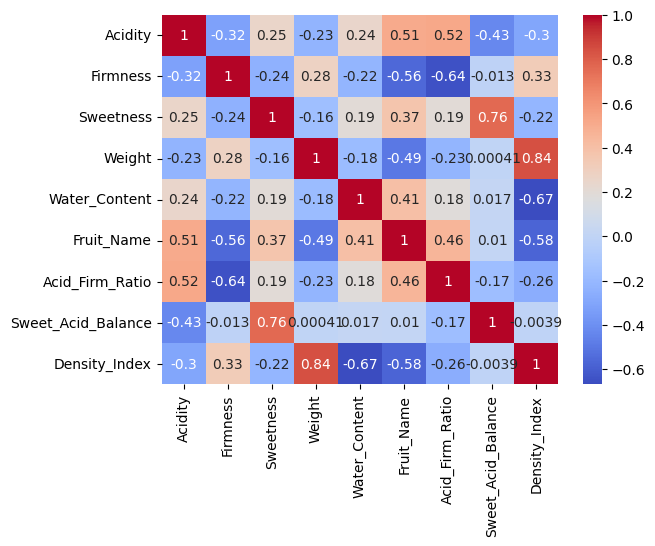

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()